In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df = df.drop('Loan_ID',axis = 1)

In [42]:
df.shape

(614, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [44]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [48]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [49]:
df['Gender'] = df['Gender'].fillna('Male')
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## female = 0 ,male = 1

In [50]:
df['Gender'] = np.where(df['Gender'].str.contains('Female'),0,1)
df['Gender'].value_counts()
df['Gender'] = df['Gender'].astype(int)


Text(0.5, 1.0, 'Male vs Female who apply for lone')

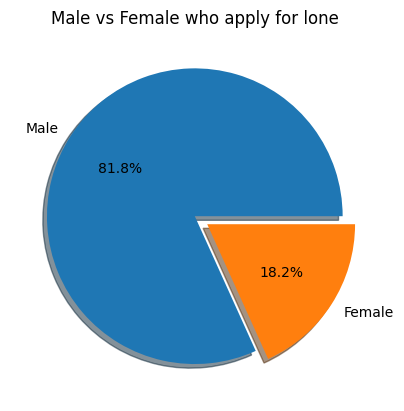

In [51]:
le = ['Male','Female']
plt.pie(df['Gender'].value_counts(),labels= le,explode=[0,0.1],shadow=True,autopct='%1.1f%%')
plt.title("Male vs Female who apply for lone")

## currect Married column

In [52]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

Text(0.5, 1.0, 'Married vs Unmarried person who apply for lone')

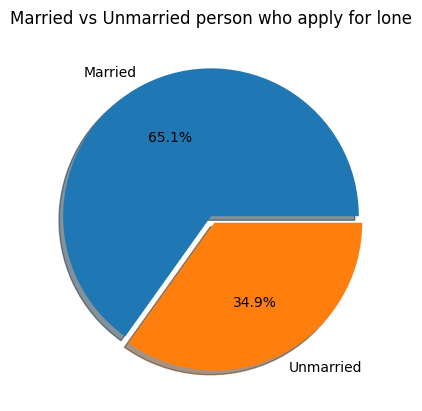

In [53]:
plt.pie(df['Married'].value_counts(),labels=['Married','Unmarried'],explode=[0,0.05],shadow=True,autopct="%1.1f%%")
plt.title("Married vs Unmarried person who apply for lone")

In [54]:
df['Married'] = np.where(df['Married'].str.contains('No'),0,1)



In [55]:
df['Married'] = df['Married'].astype(int)

## fixed Dependents column

In [56]:
df = df.drop('Dependents',axis=1)

## fixed Education column

In [57]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Text(0.5, 1.0, 'Graduate vs Not Graduate person who apply for lone')

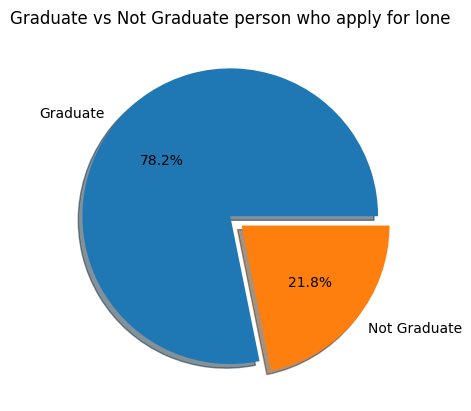

In [58]:
plt.pie(df['Education'].value_counts(),labels=['Graduate','Not Graduate'],explode=[0,0.1],shadow=True,autopct="%1.1f%%")
plt.title("Graduate vs Not Graduate person who apply for lone")

In [59]:
df['Education'] = np.where(df['Education'].str.contains('Not Graduate'),0,1)

In [60]:
df["Education"]=df['Education'].astype(int)

## fixed Self_Employed column

In [61]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [62]:
df['Self_Employed'] = np.where(df['Self_Employed'].str.contains('No'),0,1)

In [63]:
df['Self_Employed'] = df['Self_Employed'].astype(int)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 52.9+ KB


In [65]:
df = df.drop('Property_Area',axis=1)

In [66]:
df.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [67]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [68]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Loan_Amount_Term'].isnull().sum()

np.int64(0)

In [69]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [70]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 48.1+ KB


In [72]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [73]:
df['Loan_Status'] = np.where(df['Loan_Status'].str.contains('N'),0,1)

In [74]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [75]:
df.to_csv('clean_data.csv',index=False)